# Regularizations for linear model

Increasing a model's complexity will increase the chance to be overfit. In contrast, reducing a model's complexity increase the chance to be underfit. This is also known as the bias/variance trade-off.

<img src="https://i.imgur.com/QLMz7mZ.png" width="150%"/>

Regularization is a good way to reduce overfit. 
- **Some weights gradients are relatively bigger** and **some relatively smaller** thus, **some weight parameters are being updated faster** and **some slower** during the training 

=> from observations it might lead to a more complex and less accurate solution on test-set

- For linear model, regularization is typically achieved by **penalizing large individual weights**

=> A regularization term is added to the cost function.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




By **adding a regularization term to the loss function**, we are trying to achieve 2 goals at once:
- We try to **fit the training data well** (by keep small loss)
- We try to **keep the weights small so no weight (weights) will stand out** and cause overfitting

Further reading: https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd


## **L2 Regularization** (or Ridge Regression in Linear Regression)

$$
L_2 = ||w||_2^2 = \sum_{j=1}^nw_j^2
$$

Ridge Regression:

$$
min_w \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} + \alpha ||w||_2^2
$$
![](https://miro.medium.com/max/770/1*GagrtxPolqxlCR6ZP6CB7w.png)
![](https://cdn.shortpixel.ai/client/to_avif,q_glossy,ret_img,w_715/https://labs.sogeti.com/wp-content/uploads/2020/08/L2-regularization.png)

- The optimal point is a point which is common point between ellipse and circle as well as gives a minimum value for the above function 

## **L1 Regularization** (or Lasso Regression in Linear Regression):

$$
L_1 = ||w||_1 = \sum_{j=1}^n|w_j|
$$

Lasso Regression:

$$
min_w \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} + \alpha ||w||_1
$$

![](https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_712/https://labs.sogeti.com/wp-content/uploads/2020/08/L1-Regularization.png)

- There is a high probability that optimum point falls in the corner point of diamond, which makes either coefficients B1 (or W1) or B2 (or W2) zero. This will eventually results in sparse coefficients

**Comparing L1 and L2 regularization**

![](https://miro.medium.com/max/660/1*GSQfWiZolZzSJfGTRaDnMg.png)

Each quadrant in here has a Gradient Descent contour for a different Linear Regression problem. Green, Blue, Brown colors indicate they are related to different Linear Regression problems. The RED circle in each contour intersects the Ridge or L2 Norm. The BLACK circle in each contour intersects the Lasso or L1 Norm.


- Except for one case, L1 Norm converges on or very close to the axes and hence removing feature from the model.

=> This indicates that L1 Norm or Lasso Regularization acts as **Feature Selector** while reducing Variance.


## **Elastic Net** (a middle ground between Ridge Regression and Lasso Regression)


$$
min_w \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} + \alpha r ||w||_1 + 0.5\alpha(1-r)||w||_2^2
$$

* $\alpha = 0$ is equivalent to an ordinary least square, solved by Linear Regression
* $0 \leq r \leq 1$, for $r=0 \rightarrow$ Ridge Regression, for $r=1 \rightarrow$ Lasso Regression. For $0 < r < 1$, the penalty is a combination of L1 and L2.
* This is equivalent to $a||w||_1 + b ||w||_2^2$ where $\alpha=a+b$ and $r = \frac{a}{a+b}$


### Example

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/overfitting_underfitting_dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

sns.set_style('whitegrid')

x = df[['X']].values
y = df[['Y']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102)

In [ ]:
X_train.shape,X_test.shape

((52, 1), (13, 1))

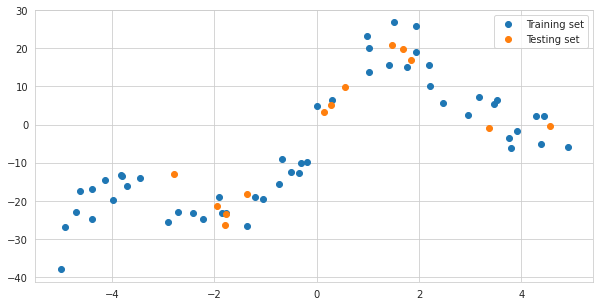

In [ ]:

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Testing set')
plt.legend()
plt.show()

In [ ]:
degree = 100
poly_reg = PolynomialFeatures(degree=degree,include_bias=False)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
x_plot = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_plot_poly = poly_reg.fit_transform(x_plot)
print(X_train_poly.shape)

(52, 100)


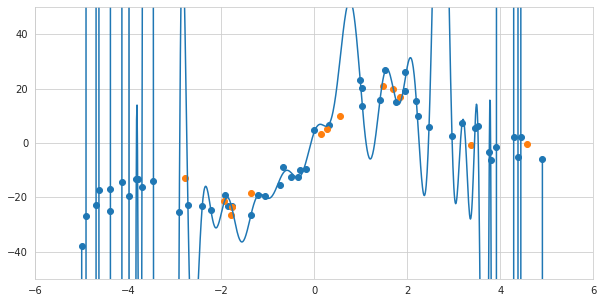

In [ ]:
# Linear Regression model
lm = LinearRegression(normalize=True)
lm.fit(X_train_poly, y_train)

y_plot = lm.predict(x_plot_poly)
plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.show()

In [ ]:
lm.coef_[:,:20]

array([[ 4.59148003e+01, -1.69808916e+02, -2.79826851e+02,
         1.29373357e+03,  1.57458770e+03, -3.14030137e+03,
        -3.44305356e+03,  3.80251359e+03,  3.82531245e+03,
        -2.74958764e+03, -2.51261105e+03,  1.29702446e+03,
         1.05783501e+03, -4.18238800e+02, -2.97889697e+02,
         9.42385438e+01,  5.70500435e+01, -1.48620316e+01,
        -7.36707512e+00,  1.60336482e+00]])

Polynomial degree of 100

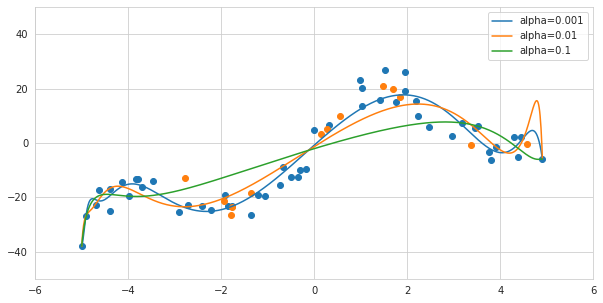

In [ ]:
# Ridge regression or L2

alphas = [0.001,0.01,0.1]
# alphas = [0.01]
ridge_models = [Ridge(alpha=alpha, normalize=True) for alpha in alphas] # L2 reg

plt.figure(figsize=(10, 5))

for i, model in enumerate(ridge_models):
    model.fit(X_train_poly, y_train)
    y_plot = model.predict(x_plot_poly)
    plt.plot(x_plot, y_plot, label=f'alpha={alphas[i]}')

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.legend()
plt.show()

In [ ]:
ridge_model = Ridge(alpha=0.001, normalize=True)
ridge_model.fit(X_train_poly, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_model.coef_[:,:20]

array([[ 1.51825329e+01, -6.60577175e-01, -1.16010519e+00,
        -3.38172609e-03, -2.48312983e-03,  8.93619625e-04,
         6.53019251e-04,  8.20789914e-06,  2.80821957e-05,
        -6.82479711e-07,  8.02298227e-07, -3.64455612e-08,
         1.66984185e-08, -9.68853434e-10,  1.44012443e-10,
        -7.16062500e-12, -9.50395540e-12,  8.94843217e-13,
        -7.70192977e-13,  6.98248983e-14]])

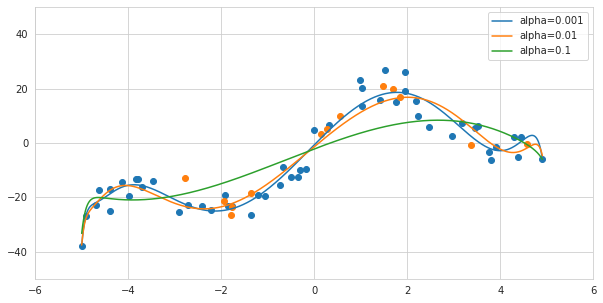

In [ ]:
# Lasso regression or L1

alphas = [0.001,0.01,0.1]
# alphas=[0]
lasso_models = [Lasso(alpha=alpha, normalize=True) for alpha in alphas] # L1

plt.figure(figsize=(10, 5))

for i, model in enumerate(lasso_models):
    model.fit(X_train_poly, y_train)
    y_plot = model.predict(x_plot_poly)
    plt.plot(x_plot, y_plot, label=f'alpha={alphas[i]}')

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.legend()
plt.show()

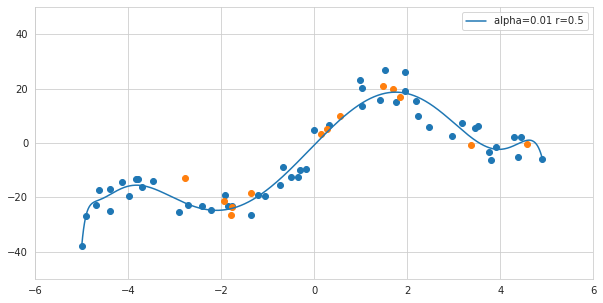

In [ ]:
alpha = 0.01
r = 0.5
elastic_net = ElasticNet(alpha=alpha, l1_ratio=r)
elastic_net.fit(X_train_poly, y_train)
plt.figure(figsize=(10, 5))
y_plot = elastic_net.predict(x_plot_poly)
plt.plot(x_plot, y_plot, label=f'alpha={alpha} r={r}')
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.legend()
plt.show()